In [1]:
from pandas import read_excel
from pandas import DataFrame
from pandas import merge
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# 모델을 구성하기위한 객체
from tensorflow.keras.models import Sequential
# 모델에 학습층을 쌓기 위한 클래스
from tensorflow.keras.layers import Dense
# 데이터를 훈련용과 테스트용으로 나누는 기능
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 학습에 대한 콜백함수 처리용 패키지 참조
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# 표준화 처리 패키지
from sklearn.preprocessing import StandardScaler
# (신규) 분류결과 평가 지표 관련 패키지
from sklearn.metrics import classification_report, confusion_matrix

# 회귀분석을 수행하는 통계 패키지 (머신러닝과는 연관 없음)
from statsmodels.formula.api import logit

In [2]:
np.random.seed(777)

In [3]:
df = read_excel('http://itpaper.co.kr/data/gradeuate.xlsx', engine='openpyxl')
df

,합격여부,필기점수,학부성적,병원경력
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [4]:
df.isna().sum()

합격여부    0
필기점수    0
학부성적    0
병원경력    0
dtype: int64

In [5]:
df.describe()

,합격여부,필기점수,학부성적,병원경력
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [6]:
x_train_set = df.drop('합격여부', axis=1)
y_train_set = df.filter(['합격여부'])
print("훈련데이터 크기:", x_train_set.shape, "/ 레이블 크기:", y_train_set.shape)

훈련데이터 크기: (400, 3) / 레이블 크기: (400, 1)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_train_set, y_train_set, test_size=0.33, random_state=777)
print("훈련용 데이터셋 크기: %d, 검증용 데이터셋 크기: %d" % (len(x_train), len(x_test)))

훈련용 데이터셋 크기: 268, 검증용 데이터셋 크기: 132


In [8]:
scaler = StandardScaler()
std_x_train = DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
std_x_test = DataFrame(scaler.transform(x_test), columns=x_test.columns)
std_x_train.head()
std_x_test.head()

,필기점수,학부성적,병원경력
0,1.297966,-0.162217,1.634940
1,-0.913337,-0.995253,-1.610718
2,0.787666,-1.047318,1.634940
3,-0.913337,-1.281610,-1.610718
4,0.617565,0.592723,-0.528832


In [9]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3, )))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [10]:
result = model.fit(std_x_train, y_train, epochs = 500, validation_data = (std_x_test, y_test), callbacks = [
    #ModelCheckpoint(filepath = 'check_point.h5', monitor = 'val_loss', verbose=1, save_best_only = True),
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500
9/9 [==============================] - 1s 17ms/step - loss: 0.7173 - acc: 0.3993 - val_loss: 0.7118 - val_acc: 0.4621
Epoch 2/500
9/9 [==============================] - 0s 4ms/step - loss: 0.6997 - acc: 0.4925 - val_loss: 0.6957 - val_acc: 0.4848
Epoch 3/500
9/9 [==============================] - 0s 4ms/step - loss: 0.6860 - acc: 0.5448 - val_loss: 0.6829 - val_acc: 0.5530
Epoch 4/500
9/9 [==============================] - 0s 4ms/step - loss: 0.6751 - acc: 0.5970 - val_loss: 0.6721 - val_acc: 0.6212
Epoch 5/500
9/9 [==============================] - 0s 4ms/step - loss: 0.6656 - acc: 0.6530 - val_loss: 0.6624 - val_acc: 0.6667
Epoch 6/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6573 - acc: 0.6493 - val_loss: 0.6529 - val_acc: 0.6818
Epoch 7/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6498 - acc: 0.6679 - val_loss: 0.6438 - val_acc: 0.6515
Epoch 8/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6425 - acc: 0.6828 - va

,loss,acc,val_loss,val_acc,lr
epochs,,,,,
1,0.717334,0.399254,0.711783,0.462121,0.00100
2,0.699694,0.492537,0.695671,0.484848,0.00100
3,0.686027,0.544776,0.682923,0.553030,0.00100
4,0.675113,0.597015,0.672117,0.621212,0.00100
5,0.665648,0.652985,0.662450,0.666667,0.00100
...,...,...,...,...,...
58,0.586175,0.697761,0.553727,0.727273,0.00050
59,0.586075,0.697761,0.553836,0.727273,0.00050
60,0.586005,0.701493,0.553679,0.727273,0.00050


In [13]:
evaluate = model.evaluate(std_x_test, y_test)
print("최종 손실률: %f, 최종 정확도: %f" % (evaluate[0], evaluate[1]))

5/5 [==============================] - 0s 750us/step - loss: 0.5538 - acc: 0.7273
최종 손실률: 0.553761, 최종 정확도: 0.727273


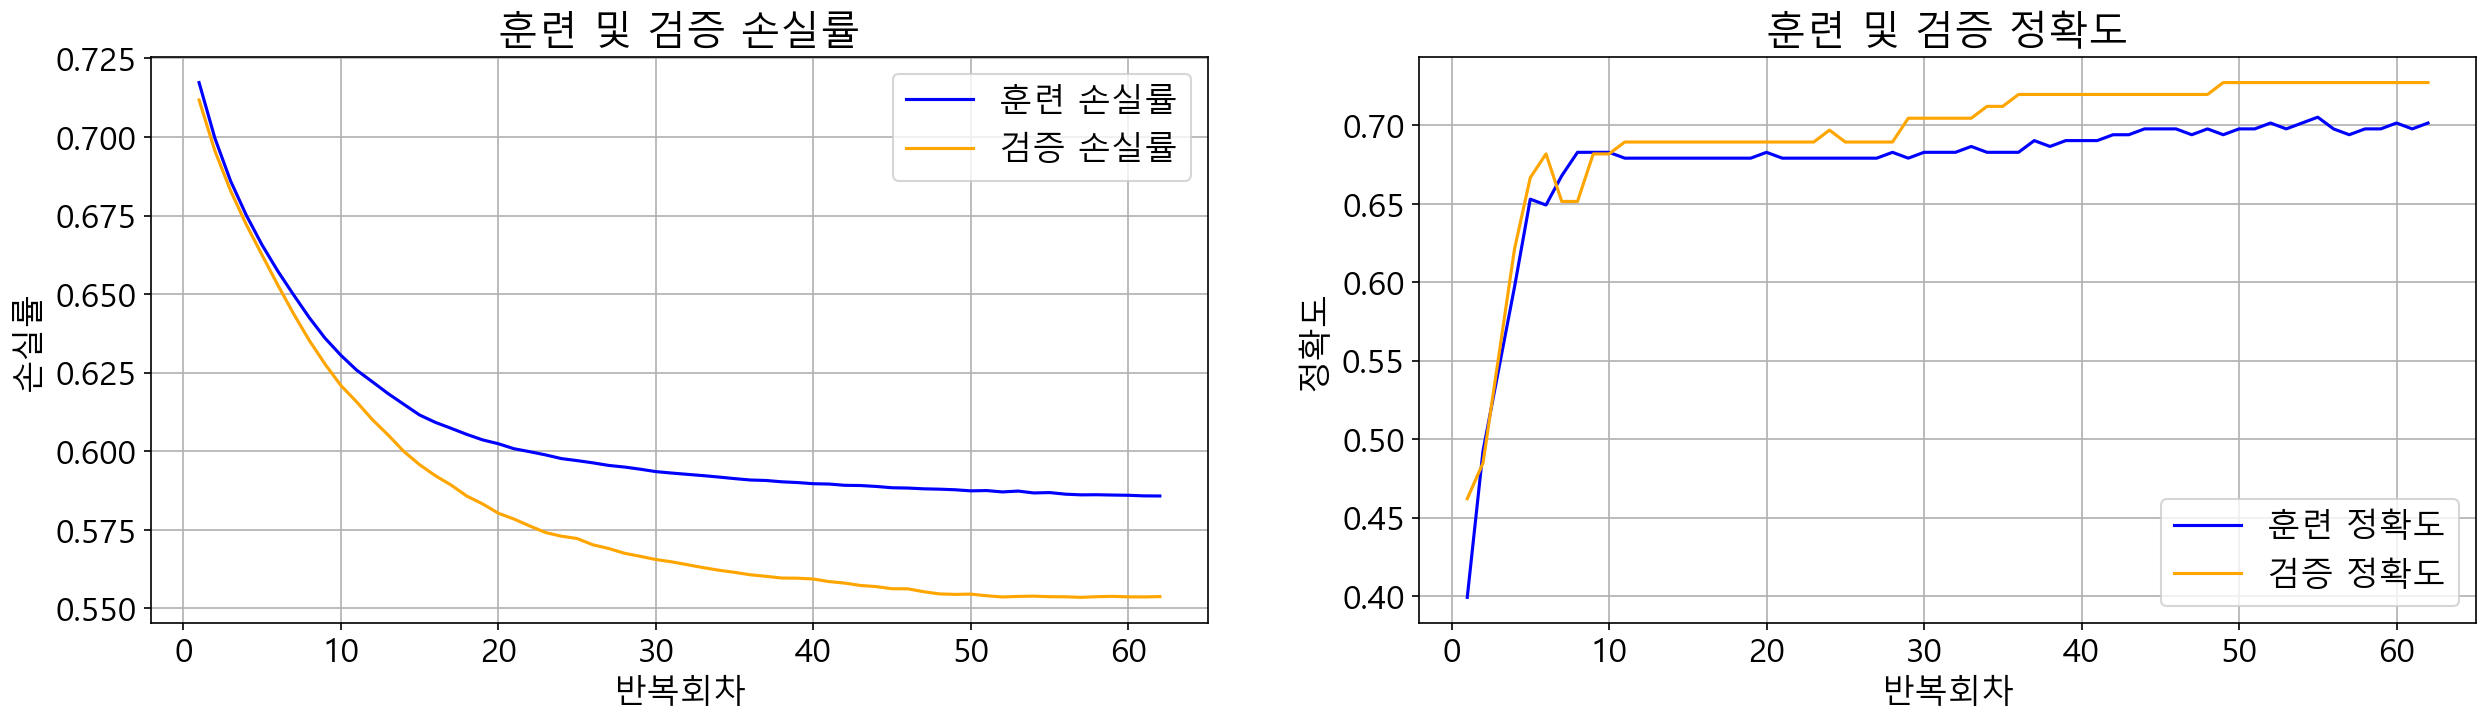

In [14]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sns.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 정확도 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='acc', data=result_df, color = 'blue', label = '훈련 정확도', ax=ax2)
sns.lineplot(x=result_df.index, y='val_acc', data=result_df, color = 'orange', label = '검증 정확도', ax=ax2)
ax2.set_title('훈련 및 검증 정확도')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

In [16]:
results = model.predict(std_x_test)
data_count, case_count = results.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
print(results)

132개의 검증 데이터가 1개의 경우의 수를 갖는다.
[[0.2664805 ]
 [0.29330897]
 [0.21320832]
 [0.2660081 ]
 [0.44469482]
 [0.2051239 ]
 [0.48896804]
 [0.13594186]
 [0.37068713]
 [0.44808844]
 [0.53882736]
 [0.2873914 ]
 [0.14464301]
 [0.3963957 ]
 [0.39598605]
 [0.37454987]
 [0.47925317]
 [0.33324403]
 [0.3982055 ]
 [0.18826118]
 [0.17526755]
 [0.3690731 ]
 [0.3434583 ]
 [0.20084545]
 [0.36183196]
 [0.4412746 ]
 [0.19286135]
 [0.46003187]
 [0.34553027]
 [0.4168162 ]
 [0.27472097]
 [0.0484376 ]
 [0.2239584 ]
 [0.35365206]
 [0.38832703]
 [0.32171738]
 [0.23303244]
 [0.33467   ]
 [0.26418775]
 [0.28533983]
 [0.24673915]
 [0.35524535]
 [0.399449  ]
 [0.47174773]
 [0.47493568]
 [0.15743339]
 [0.18228781]
 [0.1685633 ]
 [0.11031502]
 [0.4513892 ]
 [0.30334175]
 [0.30426067]
 [0.10080183]
 [0.18333292]
 [0.5198222 ]
 [0.16962615]
 [0.493284  ]
 [0.39850622]
 [0.21213946]
 [0.4939072 ]
 [0.48311812]
 [0.45888445]
 [0.20458499]
 [0.19670686]
 [0.47975177]
 [0.28729934]
 [0.4225372 ]
 [0.43822035]
 [0.3128004 ]
 [0.

In [17]:
f_results = results.flatten()
f_results

array([0.2664805 , 0.29330897, 0.21320832, 0.2660081 , 0.44469482,
       0.2051239 , 0.48896804, 0.13594186, 0.37068713, 0.44808844,
       0.53882736, 0.2873914 , 0.14464301, 0.3963957 , 0.39598605,
       0.37454987, 0.47925317, 0.33324403, 0.3982055 , 0.18826118,
       0.17526755, 0.3690731 , 0.3434583 , 0.20084545, 0.36183196,
       0.4412746 , 0.19286135, 0.46003187, 0.34553027, 0.4168162 ,
       0.27472097, 0.0484376 , 0.2239584 , 0.35365206, 0.38832703,
       0.32171738, 0.23303244, 0.33467   , 0.26418775, 0.28533983,
       0.24673915, 0.35524535, 0.399449  , 0.47174773, 0.47493568,
       0.15743339, 0.18228781, 0.1685633 , 0.11031502, 0.4513892 ,
       0.30334175, 0.30426067, 0.10080183, 0.18333292, 0.5198222 ,
       0.16962615, 0.493284  , 0.39850622, 0.21213946, 0.4939072 ,
       0.48311812, 0.45888445, 0.20458499, 0.19670686, 0.47975177,
       0.28729934, 0.4225372 , 0.43822035, 0.3128004 , 0.40439487,
       0.37763652, 0.28702557, 0.27345014, 0.24054885, 0.10469

In [18]:
kdf = DataFrame({
    '결과값': y_test['합격여부'],
    '합격확률(%)': np.round(f_results * 100, 1),
    '예측치' : np.round(f_results)
})

kdf

,결과값,합격확률(%),예측치
210,0,26.600000,0.0
222,1,29.299999,0.0
278,1,21.299999,0.0
148,1,26.600000,0.0
21,1,44.500000,0.0
...,...,...,...
120,1,49.599998,0.0
249,0,34.299999,0.0
29,0,39.500000,0.0
153,0,30.200001,0.0


In [19]:
# 예측 데이터(ca_y_test)를 x축으로, 결과 데이터(results)를 y축으로 놓는 오차행렬(confusion_matrix) 생성하기 
cm = confusion_matrix(kdf['결과값'], kdf['예측치'])
cmdf1 = DataFrame(cm, columns=['예측값(P)', '예측값(N)'], index=['실제값(P)', '실제값(N)'])
cmdf1

,예측값(P),예측값(N)
실제값(P),89,2
실제값(N),34,7


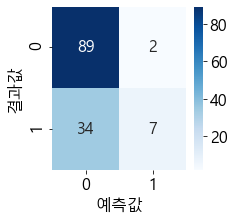

In [20]:
# --> 5를 분류할 때 가장 많이 혼란스러워 한다.
# --> 오차행렬은 모델의 강점과 약점을 파악하기에 유용하다.
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (3, 3)

# 오차 행렬을 히트맵 그래프로 표현
# -> annot : 그래프의 각 칸에 수치값 출력
# -> fmt : 수치값 출력 format (여기서는 10진수)
# -> cmap : 색상맵 (https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html)
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('예측값')
plt.ylabel('결과값')
plt.show()

### 분류 보고서
- precision : 정밀도 (분류기가 참으로 분류한 항목 중에서 실제 데이터가 참인 비율)
- recall : 재현율 (실제 참 중에서 분류기가 참으로 분류한 비율)
- f1-score : 2(Recall Precision) / (Recall + Precision)
- Precision과 Recall의 조화평균
주로 분류 클래스 간 데이터가 심각한 불균형을 이루는 경우에 사용
정확도의 경우, 클래스가 데이터 분류가 균일하지 못하면 머신의 성능을 제대로 나타내줄 수 없기 때문에 F1을 사용한다.
support : 전체 데이터 수

In [21]:
report = classification_report(kdf['결과값'], kdf['예측치'])
print(report)

              precision    recall  f1-score   support

           0       0.72      0.98      0.83        91
           1       0.78      0.17      0.28        41

    accuracy                           0.73       132
   macro avg       0.75      0.57      0.56       132
weighted avg       0.74      0.73      0.66       132



In [22]:
from pandas import merge
train_df = merge(x_train, y_train, left_index=True, right_index=True)
train_df
model = logit('합격여부 ~ 필기점수+학부성적+병원경력', data=train_df)
fit = model.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.595016
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   합격여부   No. Observations:                  268
Model:                          Logit   Df Residuals:                      264
Method:                           MLE   Df Model:                            3
Date:                Fri, 09 Jul 2021   Pseudo R-squ.:                 0.05183
Time:                        14:29:45   Log-Likelihood:                -159.46
converged:                       True   LL-Null:                       -168.18
Covariance Type:            nonrobust   LLR p-value:                 0.0005753
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2539      1.332     -2.443      0.015      -5.865      -0.643
필기점수           0.0015      0.

In [23]:
from pandas import merge
test_df = merge(x_test, y_test, left_index=True, right_index=True)
test_df
pred2 = fit.predict(test_df)
pred2

210    0.217792
222    0.348474
278    0.163596
148    0.329363
21     0.422170
         ...   
120    0.392401
249    0.332780
29     0.411752
153    0.270029
168    0.332943
Length: 132, dtype: float64

In [24]:
kdf['통계치'] = np.round(pred2.values)
kdf

,결과값,합격확률(%),예측치,통계치
210,0,26.600000,0.0,0.0
222,1,29.299999,0.0,0.0
278,1,21.299999,0.0,0.0
148,1,26.600000,0.0,0.0
21,1,44.500000,0.0,0.0
...,...,...,...,...
120,1,49.599998,0.0,0.0
249,0,34.299999,0.0,0.0
29,0,39.500000,0.0,0.0
153,0,30.200001,0.0,0.0


In [25]:
# 예측 데이터(ca_y_test)를 x축으로, 결과 데이터(results)를 y축으로 놓는 오차행렬(confusion_matrix) 생성하기 
cm = confusion_matrix(kdf['결과값'], kdf['통계치'])
cmdf2 = DataFrame(cm, columns=['예측값(P)', '예측값(N)'], index=['실제값(P)', '실제값(N)'])
cmdf2

,예측값(P),예측값(N)
실제값(P),88,3
실제값(N),29,12


In [26]:
x = (cmdf1['예측값(P)']['실제값(P)']+cmdf1['예측값(N)']['실제값(N)']) / len(y_test)
y = (cmdf2['예측값(P)']['실제값(P)']+cmdf2['예측값(N)']['실제값(N)']) / len(y_test)
print('머신러닝 분류 정확도 : %0.2f%%, 통계 분류 정확도 : %0.2f%%' % (x, y))

머신러닝 분류 정확도 : 0.73%, 통계 분류 정확도 : 0.76%
